<span style="font-size: 24px;"><b>The shapefiles of the basins draining to the North Sea and Greater Horn of Africa</span><b>

Shapefiles of basins of the North Sea and Horn of Africa that are extracted and uploaded on Geodatabase.

In [9]:
# python preliminaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
from frommle2.core.logger import setInfoLevel,setDebugLevel
# from geoslurp.tools.rwdataframe import saveDataFrame,readDataFrame
import os
from geoslurp.db import geoslurpConnect,Settings
import pandas as pd
from geoslurp.tools.pandas import *
import xarray as xr
from frommle2.sh.shfilter import SHfilter
#Set logging level to show info messages
setDebugLevel()


In [11]:
schemeout="basin_shcoeffs"
# Make a connection with the geoslurp database
#geos=geoslurpConnect(dbalias="geoslurp",readonly_user=False)
geos=geoslurpConnect(dbalias="marge",readonly_user=False)
conf=Settings(geos)

Please enter password for kiana:  ········


In [12]:
#Retrieve polygons of relevant basins from the geoslurp database directly (basins from North Sea and Greater Horn of Africa)
#basindfs=pd.DataFrame.gslrp.load(geos,"select basin_id, in_out, area_calc, mq_m3_s, vol_km3,drainage as name,geom,ST_ASGDALRaster(gs_maskgeom(geom::geometry,0.125),'GTiff') as rast from grdc.grdc_405_basins_from_mouth where area_calc > 90000")
basindfs
basindfs=pd.DataFrame.gslrp.load(geos,"select basin_id, in_out, area_calc, mq_m3_s, vol_km3,drainage as name,geom,ST_ASGDALRaster(gs_maskgeom(geom::geometry,0.125),'GTiff') as rast from grdc.grdc_405_basins_from_mouth where area_calc > 0")


# Convert the 'geom' column to a GeoSeries
#basindfs_gdf = gpd.GeoDataFrame(basindfs, geometry='geom', crs='EPSG:4326')

display(basindfs.geom)
#display(basindfs_gdf)
num_rows, num_columns = basindfs.shape

# Print the number of rows and columns
#print(f"Number of rows: {num_rows}")
#print(f"Number of columns: {num_columns}")

0      POLYGON ((92.05120 69.81249, 92.06293 69.86524...
1      POLYGON ((118.00173 71.47542, 118.07218 71.474...
2      POLYGON ((112.33054 72.06486, 112.29124 72.071...
3      POLYGON ((132.73083 71.31036, 132.84274 71.383...
4      POLYGON ((91.99992 69.46111, 92.03256 69.42468...
                             ...                        
400    POLYGON ((37.98013 8.77615, 37.98585 8.75516, ...
401    POLYGON ((-71.01623 -15.24471, -71.00375 -15.1...
402    POLYGON ((14.60444 58.86594, 14.64026 58.87967...
403    POLYGON ((-110.70892 42.53717, -110.63528 42.3...
404    POLYGON ((91.28449 73.34571, 91.44377 73.53472...
Name: geom, Length: 405, dtype: geometry

In [14]:
#Basins-North Sea=['SEINE','RHINE','SCAUT','WESER','SKJERN A','GUDENA','THAMES','TRENT','TWEED','SPEY','GLOMA','DRAMSELV','VAENERN-GOETA']
#Basins-Jorn of Africa=['SHEBELLE', 'TANA','PANGANI','GALANA' ,'RUVU' ,'RUFIJI','ROVUMA', 'MESSALO','LURIO', 'ZAMBEZI','CONGO','LAKE CHAD','NILE'];
ids = [119, 110, 391, 103, 86, 85, 113, 102, 91, 79, 59, 65, 61, 241,269, 279,374, 287, 284, 373, 372,371, 293, 243, 356, 194]

sql_query = f"select basin_id, in_out, area_calc, mq_m3_s, vol_km3, drainage as name, geom, ST_ASGDALRaster(gs_maskgeom(geom::geometry, 0.125), 'GTiff') as rast from grdc.grdc_405_basins_from_mouth where area_calc > 0 and basin_id IN ({', '.join(map(str, ids))})"

basindfs = pd.DataFrame.gslrp.load(geos, sql_query)

# Convert the 'geom' column to a GeoSeries
# basindfs_gdf = gpd.GeoDataFrame(basindfs, geometry='geom', crs='EPSG:4326')

# Display the 'geom' column
#display(basindfs)
# display(basindfs_gdf)
num_rows, num_columns = basindfs.shape

# Print the number of rows and columns
#print(f"Number of rows: {basindfs.shape}")
#print(f"Number of columns: {num_columns}")

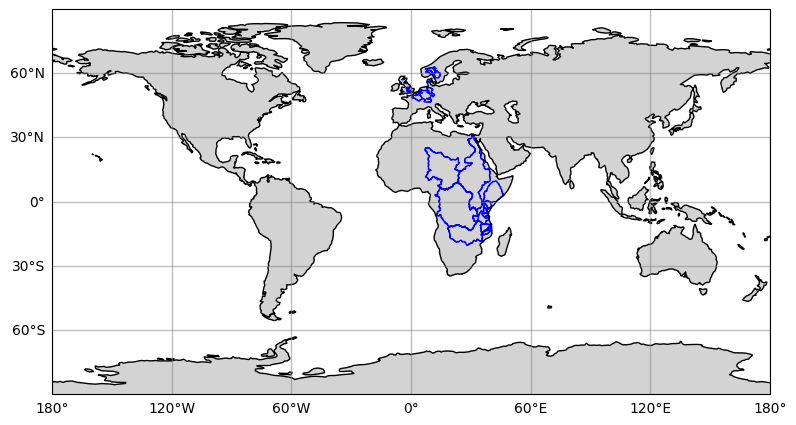

In [15]:
# ploting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})


ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Plot your GeoDataFrames on the map
basindfs.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

# Set the extent of the map
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5)
gl.top_labels = False  
gl.right_labels = False  
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

#plt.savefig("local_basins.png", dpi=300, bbox_inches='tight')

# Show the plot if needed
plt.show()

In [16]:
#!pip uninstall pandas
#!pip install pandas==1.2.5
basindfs.gslrp.save(geos,"Northsea-HornofAfrica_basins",schema=schemeout,overwrite=True,stripuri=True,xrappend_dim="basin")